In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

#Recuperer la Data
df=pd.read_csv("C:\\Users\\USER\\Documents\\GOMYCODE\\MachineLearningSupervised\\Regression\\HousePrediction\\kc_house_data.csv", sep=',')

In [65]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
df.shape

(21613, 21)

In [25]:

df.isna().sum()/df.shape[0]*100

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [26]:
list(df.select_dtypes(include='int').columns)
list(df.select_dtypes(include='float').columns)
list(df.select_dtypes(include='object').columns)

['date']

In [67]:
# Supprimer les colonnes inutiles
data = df.drop(['id', 'date'], axis=1)

In [68]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


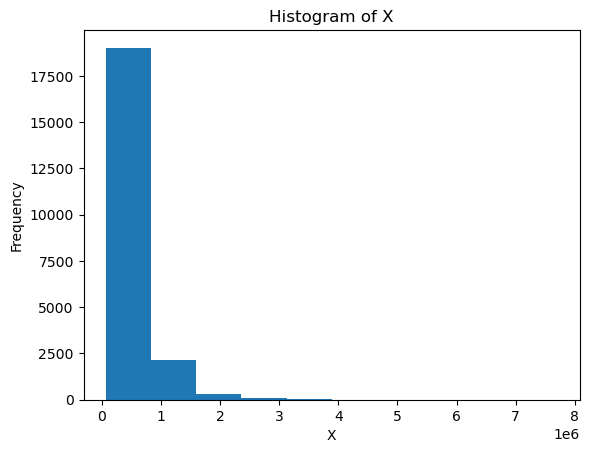

In [29]:
import matplotlib.pyplot as plt
x=data['price']
# plot histogram of variable x
plt.hist(x)
plt.title('Histogram of X')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()


In [208]:
len(data.loc[data.price > data.price.mean()])/data.shape[0]*100 #36% des maison ont a prix superieur a la moyenne 
len(data.loc[data.price < data.price.mean()])/data.shape[0]*100 #63% ont a prix inferieur a la moyenne

63.36001480590385

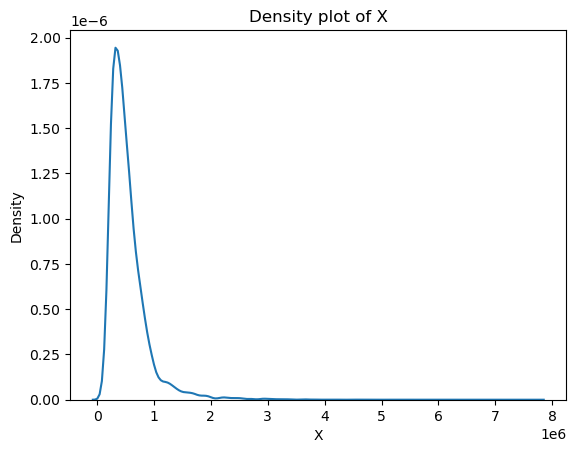

In [209]:
import seaborn as sns

# plot density plot of variable x
sns.kdeplot(x)
plt.title('Density plot of X')
plt.xlabel('X')
plt.ylabel('Density')
plt.show()


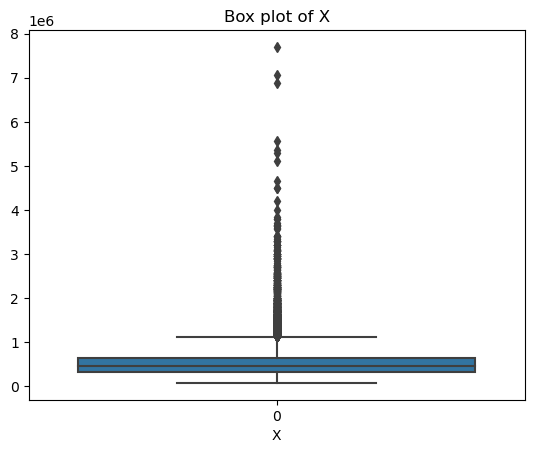

In [210]:
import seaborn as sns

# plot box plot of variable x
sns.boxplot(x)
plt.title('Box plot of X')
plt.xlabel('X')
plt.show()


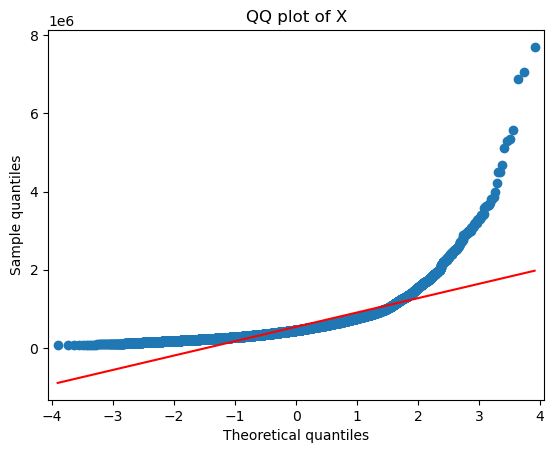

In [211]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# plot QQ-plot of variable x
sm.qqplot(x, line='s')
plt.title('QQ plot of X')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()



In [ ]:
sorted_prices = sorted(df['price'].to_list(), reverse=False)
sorted_prices

In [69]:


# Définition des données d'entrée (X) et de sortie (y)
X = data.drop('price', axis=1)
y = data['price']

transformed_y = np.log(y)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Application de la validation croisée
scores = cross_val_score(model, X, transformed_y , cv=5, scoring='neg_mean_squared_error')

# Affichage des résultats
print("Moyenne des erreurs au carré de la validation croisée : ", -scores.mean())

Moyenne des erreurs au carré de la validation croisée :  0.06440135721629865


Appliquer la LinearRegression

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Séparer les features et la variable cible
X = data.drop('price', axis=1)
y = data['price']
y = np.log(y)

# X représente les features du modèle, y représente la variable cible
# on normalise les features avec StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# on divise les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# on entraîne un modèle de régression linéaire sur les données d'entraînement
model = LinearRegression()
model.fit(X_train, y_train)

# on fait des prédictions sur les données de test
y_pred_linear = model.predict(X_test)

linear_score=model.score(X_train,y_train)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [104]:

# Calcul des métriques
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse_linear)
mae = mean_absolute_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

# Affichage des métriques
print("MSE: {:.3f}".format(mse_linear))
print("RMSE: {:.3f}".format(rmse))
print("MAE: {:.3f}".format(mae))
print("R2 score: {:.3f}".format(r2))

MSE: 0.065
RMSE: 0.255
MAE: 0.198
R2 score: 0.762


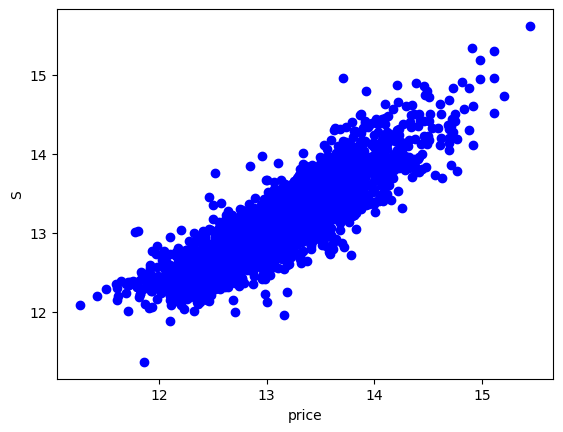

In [86]:
import matplotlib.pyplot as plt

plt.scatter(x=y_test,y=y_pred_linear,color ='b')
 

plt.ylabel("S")
plt.xlabel("price")

plt.show()

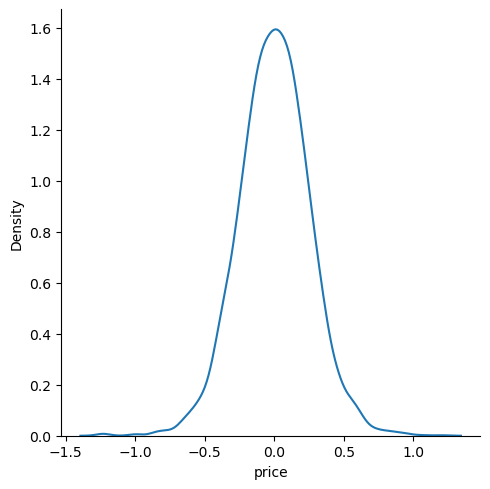

In [36]:

import seaborn as sns
residuals = y_test - y_pred_linear
sns.displot(residuals, kind='kde')


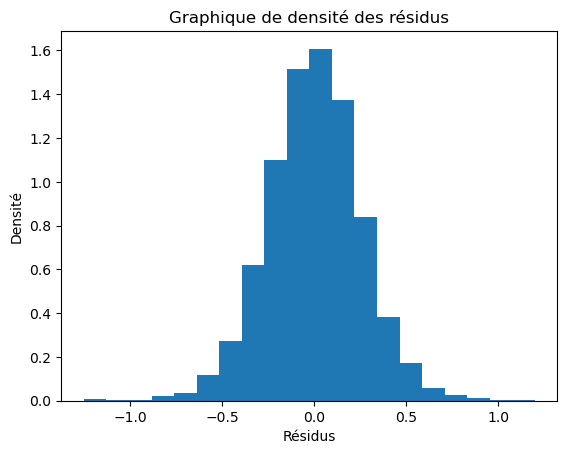

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

# Création du graphique de densité des résidus
residuals = y_test - y_pred_linear
plt.figure()
plt.title('Graphique de densité des résidus')
plt.xlabel('Résidus')
plt.ylabel('Densité')
plt.hist(residuals, bins=20, density=True)
plt.show()



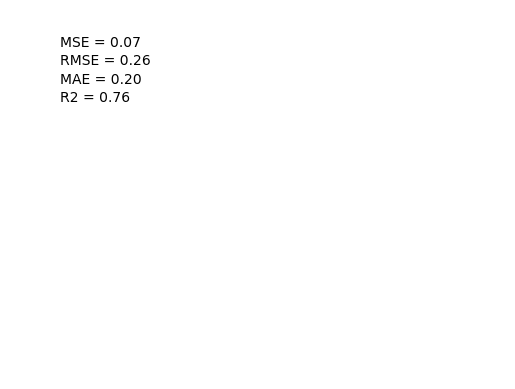

In [38]:

# Affichage des valeurs de métriques
plt.figure()
plt.text(0.1, 0.9, 'MSE = {:.2f}'.format(mse), transform=plt.gca().transAxes)
plt.text(0.1, 0.85, 'RMSE = {:.2f}'.format(rmse), transform=plt.gca().transAxes)
plt.text(0.1, 0.8, 'MAE = {:.2f}'.format(mae), transform=plt.gca().transAxes)
plt.text(0.1, 0.75, 'R2 = {:.2f}'.format(r2), transform=plt.gca().transAxes)
plt.axis('off')
plt.show()


In [39]:
import joblib

joblib.dump(model, 'C:\\Users\\USER\\Documents\\GOMYCODE\\MachineLearningSupervised\\Regression\\HousePrediction\\model.pkl')

['C:\\Users\\USER\\Documents\\GOMYCODE\\MachineLearningSupervised\\Regression\\HousePrediction\\model.pkl']

ANN

In [117]:

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



# Split data into input (X) and output (y) variables
X = data.drop('price', axis=1)
y = data['price']
y = np.log(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model architecture
modelAnn = Sequential()
modelAnn .add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
modelAnn.add(Dense(16, activation='relu'))
modelAnn.add(Dense(1))

# Compile the model
modelAnn.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
modelAnn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on test data
y_pred_ANN = modelAnn.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_ANN)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ANN)
ann_score=r2
mse_ann=mse

print('MSE: {:.3f}'.format(mse))
print('RMSE: {:.3f}'.format(rmse))
print('R2 score: {:.3f}'.format(r2))


136/136 [==============================] - 1s 3ms/step
MSE: 0.036
RMSE: 0.189
R2 score: 0.875


In [ ]:
#visualise the N.N
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

In [106]:
from sklearn.linear_model import Ridge

# Separating features and target variable
X = data.drop('price', axis=1)
y = data['price']
y = np.log(y)

# Normalizing features with StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Training a Ridge regression model on the training data
ridge_model = Ridge(alpha=1.0) # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Computing the R^2 score of the model on the training set

ridge_score=ridge_model.score(X_train, y_train)


In [107]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Calculer l'erreur quadratique moyenne (MSE) sur les données de test
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("MSE pour le modèle de régression Ridge :", mse)


MSE pour le modèle de régression Ridge : 0.06504802700455219


In [108]:
from sklearn.linear_model import Lasso

# Separating features and target variable
X = data.drop('price', axis=1)
y = data['price']


# Normalizing features with StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Training a Lasso regression model on the training data
lasso_model = Lasso(alpha=1.0) # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Computing the R^2 score of the model on the training set

lasso_score=lasso_model.score(X_train, y_train)

c:\Users\USER\anaconda3\envs\Myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.191e+13, tolerance: 2.369e+11
  model = cd_fast.enet_coordinate_descent(


In [110]:
lasso_model.score(X_train, y_train)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("MSE pour le modèle de régression Lasso :", mse_lasso)

MSE pour le modèle de régression Lasso : 37873089315.800705


In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separating features and target variable
X = data.drop('price', axis=1)
y = data['price']
y = np.log(y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the decision tree regressor object
regressorTree = DecisionTreeRegressor(max_depth=5,random_state=42)

# Fitting the model on the training data
regressorTree.fit(X_train, y_train)

# Making predictions on the test data
y_pred_tree = regressorTree.predict(X_test)

# Calculating the mean squared error of the predictions
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("MSE: {:.3f}".format(mse))


regressorTree.score(X_test,y_test)

tree_score=regressorTree.score(X_train,y_train)




MSE: 0.065


In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Séparer les features et la variable cible
X = data.drop('price', axis=1)
y = data['price']
y=np.log(y)
# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle Random Forest
modelForest = RandomForestRegressor(n_estimators=100, max_depth=5)

# Entraîner le modèle sur les données d'entraînement
modelForest.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_forest = modelForest.predict(X_test)

# Calculer les métriques d'évaluation
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_forest)
r2 = r2_score(y_test, y_pred_forest)

# Afficher les métriques d'évaluation
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("MAE: {:.3f}".format(mae))
print("R2 score: {:.3f}".format(r2))

forest_score=modelForest.score(X_train,y_train)



MSE: 0.065
RMSE: 0.255
MAE: 0.183
R2 score: 0.789


In [114]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Separating features and target variable
X = data.drop('price', axis=1)
y = data['price']
y = np.log(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the SVM regressor
regressor = SVR(kernel='linear', C=1.0)

# Training the SVM regressor
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred_svm = regressor.predict(X_test)

# Evaluating the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse = np.sqrt(mse_svm)
r2 = r2_score(y_test, y_pred_svm)

print("MSE: {:.3f}".format(mse_svm))
print("RMSE: {:.3f}".format(rmse))
print("R2 score: {:.3f}".format(r2))
svm_score=regressor.score(X_train,y_train)


MSE: 0.065
RMSE: 0.255
R2 score: 0.770


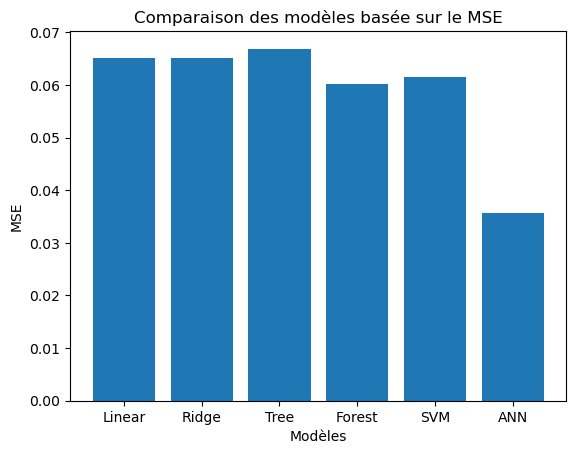

In [119]:
import matplotlib.pyplot as plt

# MSE pour chaque modèle
linear_mse =mse_linear
#lasso_mse = (mean_squared_error(y_test, y_pred_lasso))
ridge_mse = mse_ridge
tree_mse = mse_tree
forest_mse = mse_forest
svm_mse = mse_svm
ann_mse=mse_ann
# Créer une liste de noms de modèle
models = ['Linear',  'Ridge', 'Tree', 'Forest', 'SVM','ANN']

# Créer une liste des MSE pour chaque modèle
mse_values = [linear_mse,  ridge_mse, tree_mse, forest_mse, svm_mse,ann_mse]

# Créer un graphique à barres pour comparer les MSE
fig, ax = plt.subplots()
ax.bar(models, mse_values)
ax.set_title('Comparaison des modèles basée sur le MSE')
ax.set_xlabel('Modèles')
ax.set_ylabel('MSE')
plt.show()


In [120]:
# Créer un dictionnaire de noms de modèle et de MSE correspondants
model_mse_dict = {'Linear': linear_mse, 'Ridge': ridge_mse, 'Tree': tree_mse, 'Forest': forest_mse, 'SVM': svm_mse, 'ANN': ann_mse  }

# Afficher les résultats pour chaque modèle
for model, mse in model_mse_dict.items(): 
    print(model, "MSE:", mse)


Linear MSE: 0.06504802700455219
Ridge MSE: 0.0650478215436388
Tree MSE: 0.06690387357344754
Forest MSE: 0.06016169416733053
SVM MSE: 0.06157167226658613
ANN MSE: 0.03575320671392374


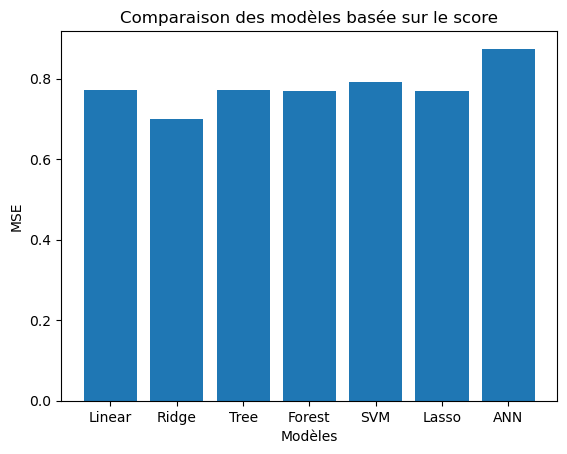

In [121]:
import matplotlib.pyplot as plt



# Créer une liste de noms de modèle
models = ['Linear',  'Ridge', 'Tree', 'Forest','SVM','Lasso','ANN']

# Créer une liste des MSE pour chaque modèle
score_values = [linear_score, lasso_score, ridge_score, tree_score, forest_score,svm_score,ann_score]

# Créer un graphique à barres pour comparer les MSE
fig, ax = plt.subplots()
ax.bar(models, score_values)
ax.set_title('Comparaison des modèles basée sur le score')
ax.set_xlabel('Modèles')
ax.set_ylabel('MSE')
plt.show()

In [122]:
# Créer un dictionnaire de noms de modèle et de MSE correspondants
model_mse_dict = {'Linear': linear_score,'Lasso':lasso_score ,'Ridge': ridge_score, 'Tree': tree_score, 'Forest': forest_score, 'SVM': svm_score, 'ANN': ann_score  }

# Afficher les résultats pour chaque modèle
for model, Score in model_mse_dict.items(): 
    print(model, "Score:", Score)

Linear Score: 0.7723747126111131
Lasso Score: 0.6998007637248942
Ridge Score: 0.7723747110268802
Tree Score: 0.7687447814247645
Forest Score: 0.7924084756443958
SVM Score: 0.7689328782858368
ANN Score: 0.8745642523882002


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from statsmodels.api import Poisson

# Charger les données d'entraînement
train_data = pd.read_csv('train_data.csv')

# Exemple de variable cible (prix)
y = train_data['prix']

# Appliquer la transformation log
y_log = np.log(y)

# Appliquer la transformation de puissance
y_pow = np.power(y, 0.5)

# Appliquer la transformation de box-cox
y_boxcox, _ = boxcox(y)

# Appliquer la régression quantile
quant_reg = LinearRegression(quantile_transformer='uniform', quantile_alpha=0.2)
quant_reg.fit(train_data.drop('prix', axis=1), y)

# Appliquer la régression de Poisson
poisson_reg = Poisson(y, train_data.drop('prix', axis=1)).fit()

# Pour savoir quand appliquer ces transformations, 
# il est important d'examiner la distribution des données et de déterminer si une transformation est nécessaire pour améliorer 
# la performance du modèle. Par exemple, 
# si la variable cible a une distribution asymétrique, une transformation de puissance ou de box-cox peut être appropriée.
#  Si la variable cible est une variable de comptage, la régression de Poisson peut être utilisée. 
# Si les données ont des valeurs extrêmes, la régression quantile peut être une méthode appropriée pour ajuster le modèle. 
# Il est important d'essayer plusieurs approches différentes pour déterminer la méthode qui fonctionne le mieux pour les données en question.


In [241]:
y.mode().to_list()


[350000.0, 450000.0]